In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('googleplaystore.csv')

In [3]:
print(data)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
data.isnull().sum(axis=0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
data = data.dropna()
print(data)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

In [7]:
data = data.dropna(how='all', axis=1)
print(data)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

In [8]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
data=data.drop(['Last Updated', 'Current Ver', 'Android Ver'], axis = 1) 

In [10]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
dtypes: float64(1), object(9)
memory usage: 804.4+ KB


In [12]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [13]:
data.Category = data.Category.map( {'ART_AND_DESIGN': 0, 'AUTO_AND_VEHICLES': 1, 'BEAUTY': 2,'BOOKS_AND_REFERENCE':3,
                    'BUSINESS':4,'COMICS':5,'COMMUNICATION':6,'DATING':7,'EDUCATION':8,'ENTERTAINMENT':9,
                    'EVENTS':10,'FINANCE':11,'FOOD_AND_DRINK':12,'HEALTH_AND_FITNESS':13,'HOUSE_AND_HOME':14,
                    'LIBRARIES_AND_DEMO':15,'LIFESTYLE':16,'GAME':17,'FAMILY':18,'MEDICAL':19,'SOCIAL':20,
                    'SHOPPING':21,'PHOTOGRAPHY':22,'SPORTS':23,'TRAVEL_AND_LOCAL':24,'TOOLS':25,'PERSONALIZATION':26,
                    'PRODUCTIVITY':27,'PARENTING':28,'WEATHER':29,'VIDEO_PLAYERS':30,'NEWS_AND_MAGAZINES':31,
                    'MAPS_AND_NAVIGATION':32,'1.9':33,} ).astype(float)

In [14]:
genreval= data["Genres"].unique()
genrevaluecount = len(genreval) 
genre_dict = {}
for i in range(0,genrevaluecount):
    genre_dict[genreval[i]] = i
data["Genres"] = data["Genres"].map(genre_dict).astype(int)

In [15]:
data['Content Rating'].unique()
data['Content Rating'] = data['Content Rating'].map({'Everyone':0,'Teen':1,'Everyone 10+':2,'Mature 17+':3,
                                                     'Adults only 18+':4}).astype(float)
data['Reviews'] = [ float(i.split('M')[0]) if 'M'in i  else float(i) for i in data['Reviews']]
data['Price'] = [ float(i.split('$')[1]) if '$' in i else float(0) for i in data['Price'] ]
data.Installs.unique()
data["Installs"] = [ float(i.replace('+','').replace(',', '')) if '+' in i or ',' in i else float(0) for i in data["Installs"] ]


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   float64
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   float64
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9359 non-null   float64
 9   Genres          9360 non-null   int32  
dtypes: float64(6), int32(1), object(3)
memory usage: 767.8+ KB


In [17]:
data= data.drop(['App'],axis= 1)
data= data.drop(['Type'],axis= 1)

In [18]:
data.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,0.0,4.1,159.0,19M,10000.0,0.0,0.0,0
1,0.0,3.9,967.0,14M,500000.0,0.0,0.0,1
2,0.0,4.7,87510.0,8.7M,5000000.0,0.0,0.0,0
3,0.0,4.5,215644.0,25M,50000000.0,0.0,1.0,0
4,0.0,4.3,967.0,2.8M,100000.0,0.0,0.0,2


In [19]:
data.Size.fillna(method = 'ffill', inplace = True)

In [20]:
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

data["Size"] = data["Size"].map(change_size)

#filling Size which had NA
data.Size.fillna(method = 'ffill', inplace = True)

In [21]:
data

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,0.0,4.1,159.0,19000000.0,10000.0,0.0,0.0,0
1,0.0,3.9,967.0,14000000.0,500000.0,0.0,0.0,1
2,0.0,4.7,87510.0,8700000.0,5000000.0,0.0,0.0,0
3,0.0,4.5,215644.0,25000000.0,50000000.0,0.0,1.0,0
4,0.0,4.3,967.0,2800000.0,100000.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...
10834,18.0,4.0,7.0,2600000.0,500.0,0.0,0.0,12
10836,18.0,4.5,38.0,53000000.0,5000.0,0.0,0.0,12
10837,18.0,5.0,4.0,3600000.0,100.0,0.0,0.0,12
10839,3.0,4.5,114.0,3600000.0,1000.0,0.0,3.0,5


In [22]:


data.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,0.0,4.1,159.0,19000000.0,10000.0,0.0,0.0,0
1,0.0,3.9,967.0,14000000.0,500000.0,0.0,0.0,1
2,0.0,4.7,87510.0,8700000.0,5000000.0,0.0,0.0,0
3,0.0,4.5,215644.0,25000000.0,50000000.0,0.0,1.0,0
4,0.0,4.3,967.0,2800000.0,100000.0,0.0,0.0,2


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   float64
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   float64
 3   Size            9360 non-null   float64
 4   Installs        9360 non-null   float64
 5   Price           9360 non-null   float64
 6   Content Rating  9359 non-null   float64
 7   Genres          9360 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 621.6 KB


In [24]:
data['Reviews'] = data['Reviews'].astype(int)

In [25]:
data.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,0.0,4.1,159,19000000.0,10000.0,0.0,0.0,0
1,0.0,3.9,967,14000000.0,500000.0,0.0,0.0,1
2,0.0,4.7,87510,8700000.0,5000000.0,0.0,0.0,0
3,0.0,4.5,215644,25000000.0,50000000.0,0.0,1.0,0
4,0.0,4.3,967,2800000.0,100000.0,0.0,0.0,2


In [26]:
data

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,0.0,4.1,159,19000000.0,10000.0,0.0,0.0,0
1,0.0,3.9,967,14000000.0,500000.0,0.0,0.0,1
2,0.0,4.7,87510,8700000.0,5000000.0,0.0,0.0,0
3,0.0,4.5,215644,25000000.0,50000000.0,0.0,1.0,0
4,0.0,4.3,967,2800000.0,100000.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...
10834,18.0,4.0,7,2600000.0,500.0,0.0,0.0,12
10836,18.0,4.5,38,53000000.0,5000.0,0.0,0.0,12
10837,18.0,5.0,4,3600000.0,100.0,0.0,0.0,12
10839,3.0,4.5,114,3600000.0,1000.0,0.0,3.0,5


In [27]:
data[data.Price>300000]

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   float64
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   int32  
 3   Size            9360 non-null   float64
 4   Installs        9360 non-null   float64
 5   Price           9360 non-null   float64
 6   Content Rating  9359 non-null   float64
 7   Genres          9360 non-null   int32  
dtypes: float64(6), int32(2)
memory usage: 585.0 KB


In [29]:
data

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,0.0,4.1,159,19000000.0,10000.0,0.0,0.0,0
1,0.0,3.9,967,14000000.0,500000.0,0.0,0.0,1
2,0.0,4.7,87510,8700000.0,5000000.0,0.0,0.0,0
3,0.0,4.5,215644,25000000.0,50000000.0,0.0,1.0,0
4,0.0,4.3,967,2800000.0,100000.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...
10834,18.0,4.0,7,2600000.0,500.0,0.0,0.0,12
10836,18.0,4.5,38,53000000.0,5000.0,0.0,0.0,12
10837,18.0,5.0,4,3600000.0,100.0,0.0,0.0,12
10839,3.0,4.5,114,3600000.0,1000.0,0.0,3.0,5


In [30]:
rating_out = data[(data['Rating']<0) & (data['Rating']>5)].index
data.drop(rating_out , inplace=True)

In [31]:
data = data[data['Reviews']<=data["Installs"]]

In [32]:
Price_out = data[(data["Price"]>=0.1)& (data["Price"]=='Free')].index
data.drop(Price_out, inplace=True)

C:\Users\family\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
data.shape

(9353, 8)

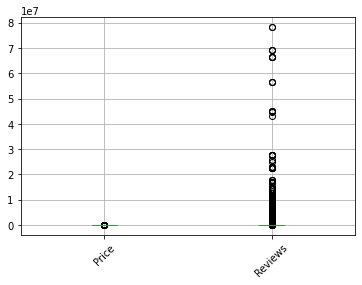

In [34]:
#boxplot Price and Review columns
boxplot = data.boxplot(column=['Price','Reviews'], rot=45)

<AxesSubplot:ylabel='Price'>

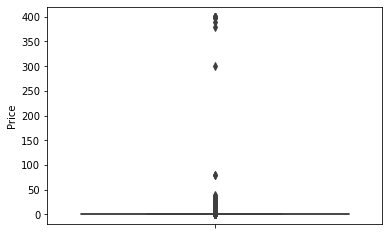

In [35]:
sns.boxplot(y=data["Price"])

In [36]:
Price_out = data[(data["Price"]>200)].index
data.drop(Price_out, inplace=True)

C:\Users\family\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:ylabel='Frequency'>

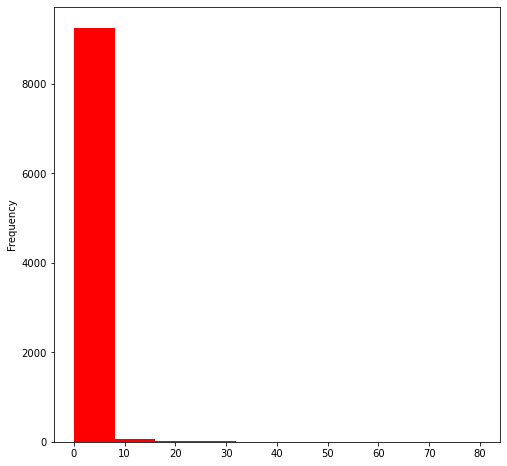

In [37]:
data.Price.plot.hist(color= "red", figsize=(8,8))

In [38]:
data.Price.unique()

array([ 0.  ,  4.99,  3.99,  6.99,  7.99,  5.99,  2.99,  3.49,  1.99,
        9.99,  7.49,  0.99,  9.  ,  5.49, 10.  , 24.99, 11.99, 79.99,
       16.99, 14.99, 29.99, 12.99,  2.49, 10.99,  1.5 , 19.99, 15.99,
       33.99, 39.99,  3.95,  4.49,  1.7 ,  8.99,  1.49,  3.88, 17.99,
        3.02,  1.76,  4.84,  4.77,  1.61,  2.5 ,  1.59,  6.49,  1.29,
       37.99, 18.99,  8.49,  1.75, 14.  ,  2.  ,  3.08,  2.59, 19.4 ,
        3.9 ,  4.59, 15.46,  3.04, 13.99,  4.29,  3.28,  4.6 ,  1.  ,
        2.95,  2.9 ,  1.97,  2.56,  1.2 ])

<AxesSubplot:ylabel='Reviews'>

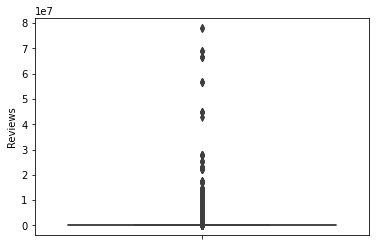

In [39]:
sns.boxplot(y=data["Reviews"])

In [40]:
data.Reviews.value_counts().head(10)

2     81
3     78
5     74
4     73
1     67
6     61
7     61
8     57
12    53
10    46
Name: Reviews, dtype: int64

C:\Users\family\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

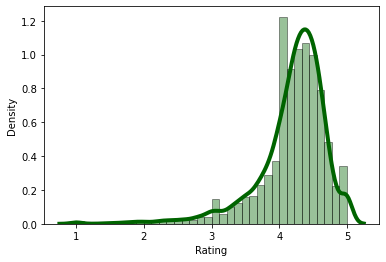

In [41]:
sns.distplot(data['Rating'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkgreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\family\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Size', ylabel='Density'>

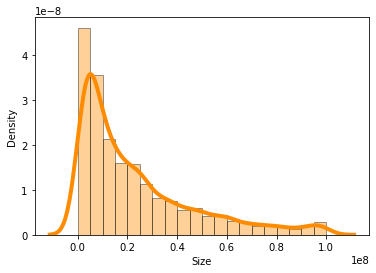

In [42]:
sns.distplot(data['Size'], hist=True, kde=True, 
             bins=int(100/5), color = 'darkorange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [43]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [44]:
#drop Price rows at 200 and higher
data=data[data['Price'] < 200]
#verify
data.shape

(9338, 8)

In [45]:
data= data[data['Reviews']<=2000000]
data.shape


(8885, 8)

In [46]:
data= data[data['Installs']<=1000000]
data.shape

(6506, 8)

In [47]:
percentiles=data[['Rating','Reviews','Size','Installs','Price']]

In [48]:
 print(np.percentile(percentiles, 10))
print(np.percentile(percentiles, 25)) 
print(np.percentile(percentiles, 50))
print(np.percentile(percentiles, 70))
print(np.percentile(percentiles, 90))
print(np.percentile(percentiles, 95))
print(np.percentile(percentiles, 99))

0.0
3.9
395.0
100000.0
12000000.0
27000000.0
63000000.0


<AxesSubplot:>

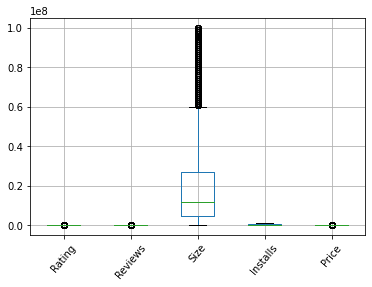

In [49]:
percentiles.boxplot(rot=50)

<AxesSubplot:>

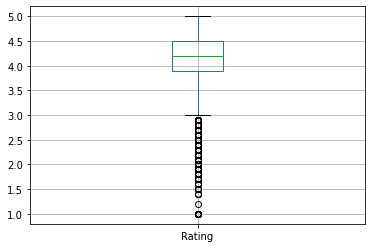

In [50]:
percentiles.boxplot(column=['Rating'])

In [51]:
data.shape

(6506, 8)

In [52]:

rating_out = data[(data['Rating']<3.5) ].index
data.drop(rating_out , inplace=True)

In [53]:
data.shape

(5814, 8)

<AxesSubplot:>

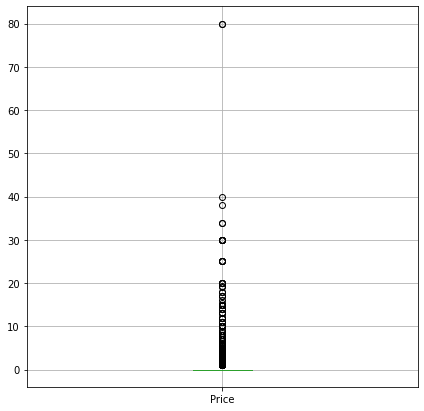

In [54]:
percentiles.boxplot(column=['Price'], figsize=(7,7))

In [55]:
price_out = data[(data['Price']>40) ].index
data.drop(price_out , inplace=True)

In [56]:
data.shape

(5812, 8)

In [57]:
#remove outliers
indexOut5 = data[(data['Installs'] >= 100000000)].index
data.drop(indexOut5 , inplace=True)
#verify
data.shape

(5812, 8)

<AxesSubplot:>

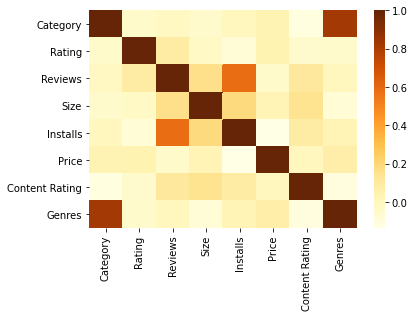

In [58]:
#correlation graph
corr1=data.corr()
sns.heatmap(corr1, cmap="YlOrBr")

<AxesSubplot:xlabel='Rating', ylabel='Price'>

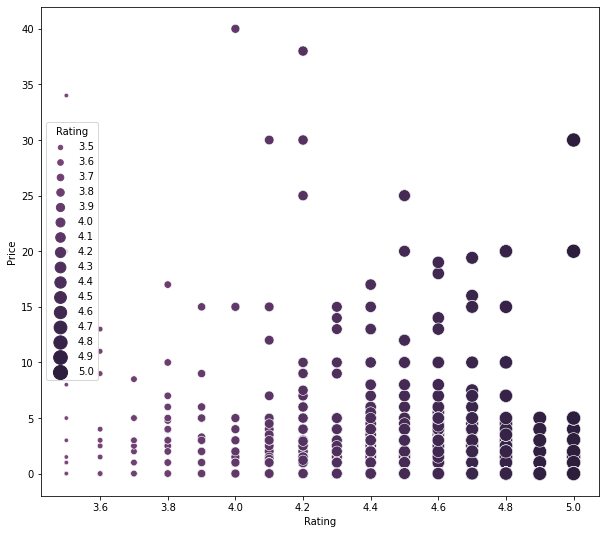

In [59]:
plt.figure(figsize=(10, 9))
sns.scatterplot(
    data=data, x="Rating", y="Price", hue="Rating", size="Rating",
    sizes=(20, 200), hue_norm=(0, 5), legend="full")

<AxesSubplot:xlabel='Rating', ylabel='Size'>

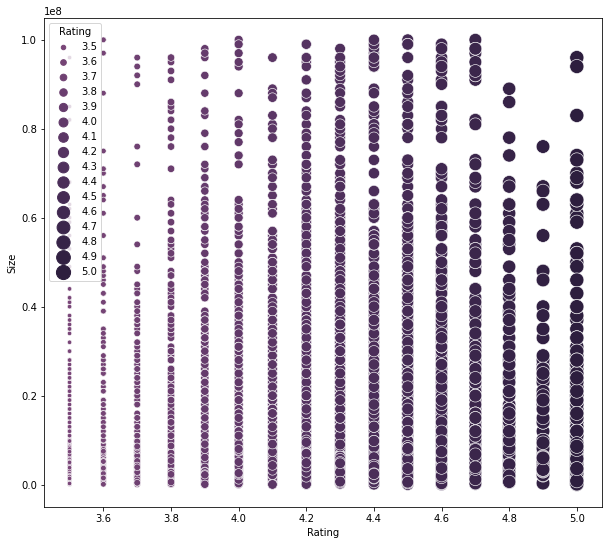

In [60]:
plt.figure(figsize=(10, 9))
sns.scatterplot(
    data=data, x="Rating", y="Size", hue="Rating", size="Rating",
    sizes=(20, 200), hue_norm=(0, 5), legend="full")

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

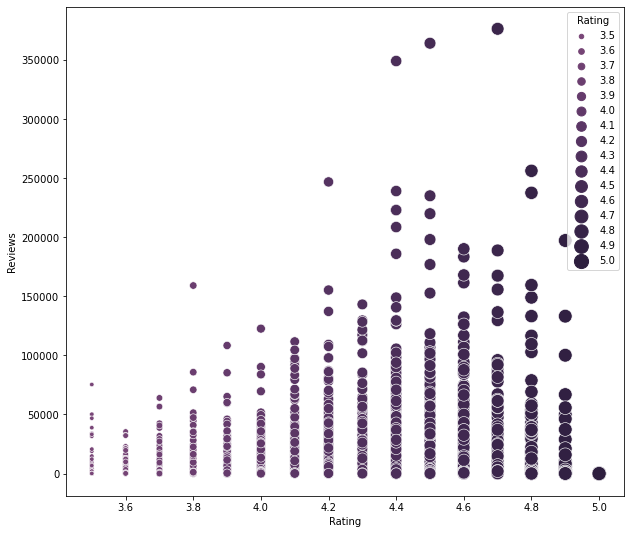

In [61]:
plt.figure(figsize=(10, 9))
sns.scatterplot(
    data=data, x="Rating", y="Reviews", hue="Rating", size="Rating",
    sizes=(20, 200), hue_norm=(0, 5), legend="full")

[None, None, None, None, None, None, None, None, None, None]

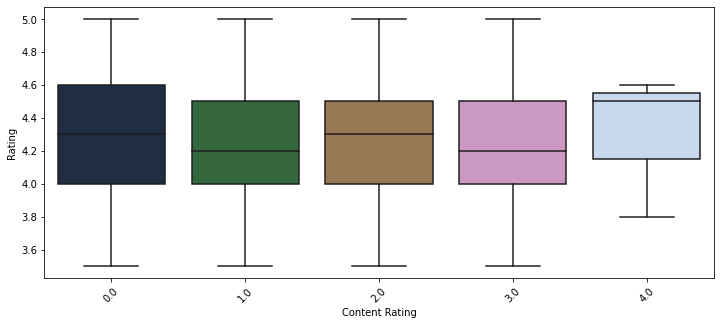

In [62]:
plt.figure(figsize=(12, 5))
r=sns.boxplot(x ='Content Rating', y ='Rating', data = data, palette ='cubehelix') 
plt.setp(r.get_xticklabels(), rotation=45)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

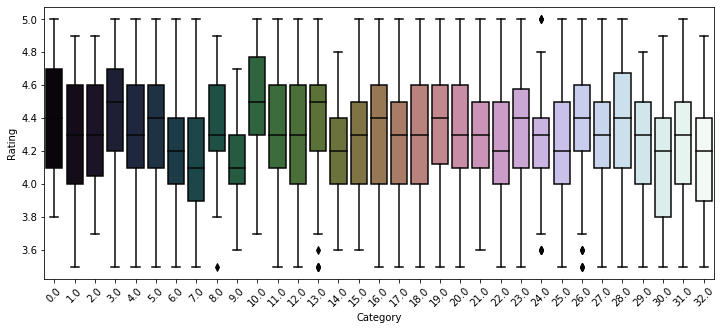

In [63]:
plt.figure(figsize=(12, 5))
r=sns.boxplot(x ='Category', y ='Rating', data = data, palette ='cubehelix') 
plt.setp(r.get_xticklabels(), rotation=45)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

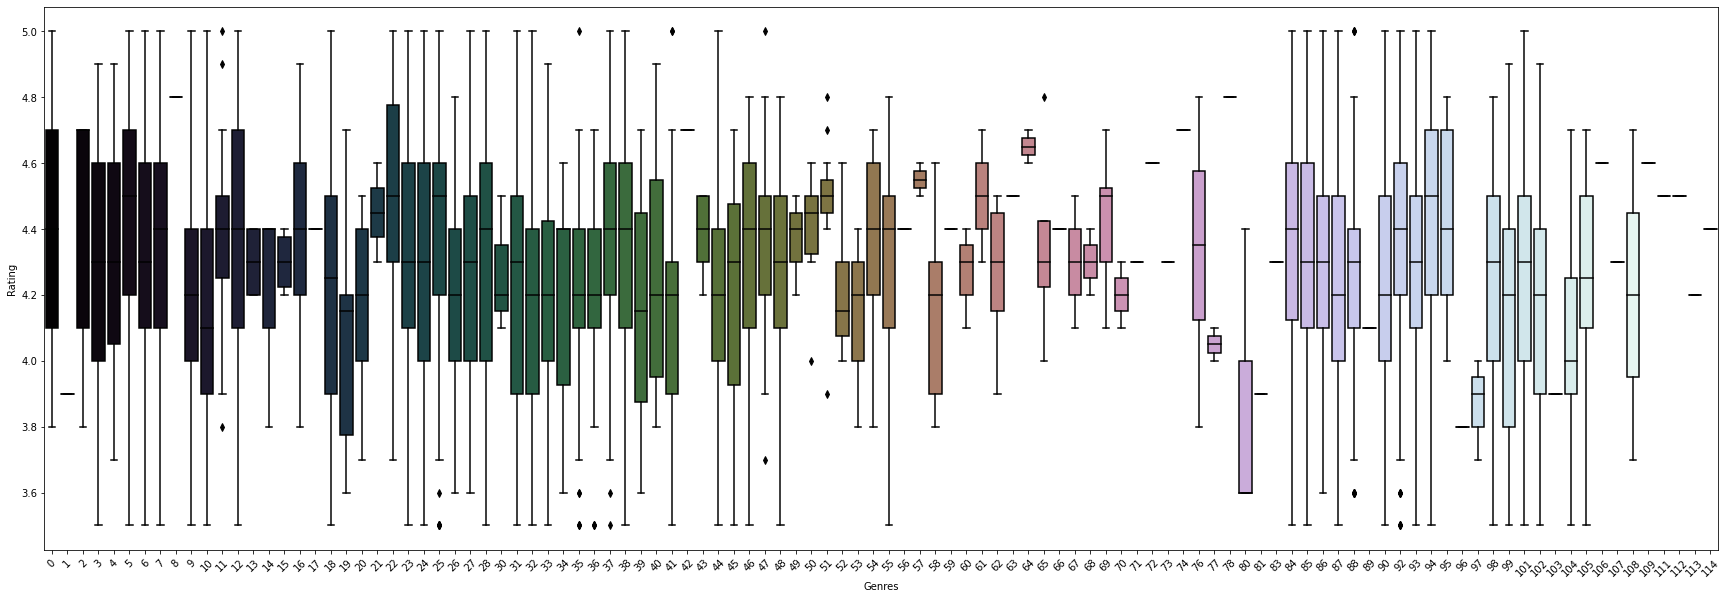

In [64]:
plt.figure(figsize=(30, 10))
r=sns.boxplot(x ='Genres', y ='Rating', data = data, palette ='cubehelix') 
plt.setp(r.get_xticklabels(), rotation=45)

In [65]:
data.describe()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
count,5812.000000,5812.000000,5812.000000,5.812000e+03,5812.000000,5812.000000,5811.000000,5812.000000
mean,17.504646,4.289436,10551.628871,1.982527e+07,329300.603063,0.460263,0.314060,48.305919
std,7.464629,0.362929,23972.169781,2.092333e+07,422319.940880,2.178104,0.758865,34.580282
min,0.000000,3.500000,1.000000,8.500000e+03,5.000000,0.000000,0.000000,0.000000
25%,13.000000,4.000000,78.000000,4.500000e+06,5000.000000,0.000000,0.000000,18.000000
50%,18.000000,4.300000,1017.000000,1.200000e+07,100000.000000,0.000000,0.000000,36.000000
75%,23.000000,4.500000,10039.750000,2.700000e+07,1000000.000000,0.000000,0.000000,87.000000
max,32.000000,5.000000,376223.000000,1.000000e+08,1000000.000000,39.990000,4.000000,114.000000


In [66]:
data = data[['Category','Reviews','Size','Installs','Price', 'Content Rating', 'Genres','Rating']]
data.head()

,Category,Reviews,Size,Installs,Price,Content Rating,Genres,Rating
0,0.0,159,19000000.0,10000.0,0.0,0.0,0,4.1
1,0.0,967,14000000.0,500000.0,0.0,0.0,1,3.9
4,0.0,967,2800000.0,100000.0,0.0,0.0,2,4.3
5,0.0,167,5600000.0,50000.0,0.0,0.0,0,4.4
6,0.0,178,19000000.0,50000.0,0.0,0.0,0,3.8


In [67]:
data.describe()

,Category,Reviews,Size,Installs,Price,Content Rating,Genres,Rating
count,5812.000000,5812.000000,5.812000e+03,5812.000000,5812.000000,5811.000000,5812.000000,5812.000000
mean,17.504646,10551.628871,1.982527e+07,329300.603063,0.460263,0.314060,48.305919,4.289436
std,7.464629,23972.169781,2.092333e+07,422319.940880,2.178104,0.758865,34.580282,0.362929
min,0.000000,1.000000,8.500000e+03,5.000000,0.000000,0.000000,0.000000,3.500000
25%,13.000000,78.000000,4.500000e+06,5000.000000,0.000000,0.000000,18.000000,4.000000
50%,18.000000,1017.000000,1.200000e+07,100000.000000,0.000000,0.000000,36.000000,4.300000
75%,23.000000,10039.750000,2.700000e+07,1000000.000000,0.000000,0.000000,87.000000,4.500000
max,32.000000,376223.000000,1.000000e+08,1000000.000000,39.990000,4.000000,114.000000,5.000000


In [71]:
x = data['Reviews'].values.reshape(-1,1)
y = data['Rating'].values.reshape(-1,1)

In [1]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

NameError: name 'train_test_split' is not defined

In [ ]:
reg1 = LinearRegression()  
reg1.fit(X_train, y_train)

In [ ]:
reg1.intercept_

In [ ]:
reg1.coef_

In [ ]:
y_pred = reg1.predict(X_test)

In [ ]:
dfReg1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfReg1

In [ ]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from statsmodels.api import OLS
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as ms

In [ ]:
summ=OLS( y_train,X_train).fit()
summ.summary()

In [ ]:
top10=dfReg1.head(10)
top10.plot(kind='bar',figsize=(8,10))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='purple', linewidth=2)
plt.show()